In [3]:
from __future__ import division, print_function
import os, matplotlib.pyplot as plt, numpy as np, pandas as pd, math
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=6, suppress=True)
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%pwd

'/Users/laurentperrinet/research/StochPong/dev'

In [14]:
import glob
print(os.path.join('..', 'datadir') + '*lvl4*', os.path.join('..', 'datadir') + '*', os.path.join('..', 'datadir', '*lvl4*') )
fname_list = glob.glob(os.path.join('..', 'datadir', 'pilot', '*lvl4*csv'))

../datadir*lvl4* ../datadir* ../datadir/*lvl4*


https://docs.python.org/3.6/library/os.path.html

In [20]:
_ , fname = os.path.split(fname_list[0])
fname, ext = fname.split('.')
print(fname)
date, time, _, level, name = fname.split('_')
print(date, time, _, level, name)

2017-06-28_135706_dataframe_lvl4_juliette
2017-06-28 135706 dataframe lvl4 juliette


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


Duration per level (in seconds) = [210.93]
Total duration = 3.52 min


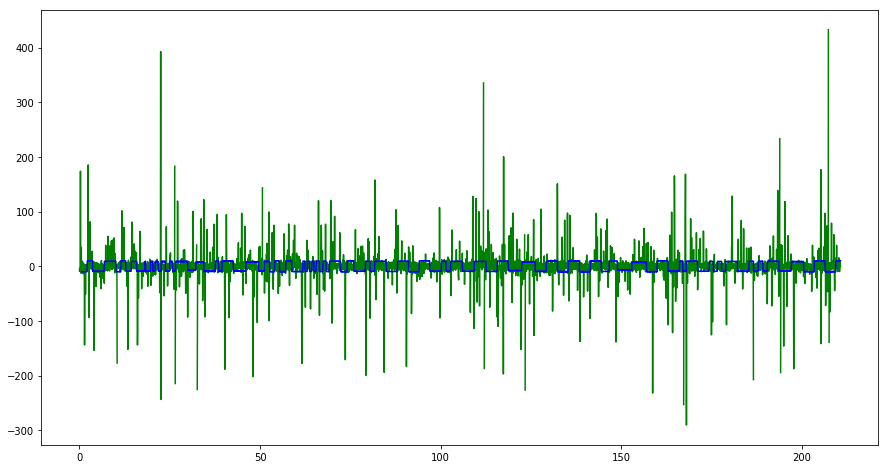

In [21]:
#subjects = ['remi', 'valerie', 'jade', 'juliette', 'elisa', 'maxime']
subjects = ['remi']
t, x, y, duration, fig, grad = {}, {}, {}, [], [], []
dfs = {}

for subj in subjects:
    i = 1
    for file in os.listdir(os.path.join('..', 'datadir', 'pilot')):
        if file.endswith(".csv"):
            if subj in file:
                dfs['df%s%s' %(subj, i)] = pd.read_csv(os.path.join('..', 'datadir', 'pilot', file), '\t')
                i += 1

# The dataframes are in the variables named : key = df<subject_name><level_number> and stored in a dict
j = 0
for key, df in dfs.items():
    fig.append(fig)
    fig[j], ax = plt.subplots(figsize=(15,8))
    for obj, color in zip(['gaze', 'ball', 'paddle'], ['g', 'b', 'r']):
        if obj == 'gaze':
            t[obj], x[obj], y[obj] = df.loc[:,'Tgaze'], df.loc[:,'Xgaze'], df.loc[:,'Ygaze']
        if obj == 'ball':
            t[obj], x[obj], y[obj] = df.loc[:,'Tball'], df.loc[:,'Xball'], df.loc[:,'Yball']
        if obj == 'paddle':
            t[obj], x[obj], y[obj] = df.loc[:,'Tpaddle'], df.loc[:,'Xpaddle'], df.loc[:,'Ypaddle']
    j += 1

    duration.append(float(str(round(t['gaze'][len(t['gaze'])-1] - t['gaze'][0],3)))) # retrieve the lengths of the levels

    """ Gradients """
    N_start, N_stop = 0, int((t['gaze'][len(t['gaze'])-1] - t['gaze'][0])*30)
    plt.plot(t['gaze'][N_start:N_stop]-t['gaze'][0], np.gradient(y['gaze'])[N_start:N_stop], 'g')
    plt.plot(t['gaze'][N_start:N_stop]-t['gaze'][0], np.gradient(y['ball'])[N_start:N_stop], 'b')

    # find the moment when the ball collide with an element from below
    k = 0
    for w in np.gradient(y['ball'])[N_start:N_stop]:
        k += 1
        if w == 0:
            if np.gradient(y['ball'])[k-2] < 0:
                grad.append(k)
                print(len(grad))
    print('\n')
    
    break

print("Duration per level (in seconds) = " + str(duration))
print("Total duration = " + str(round(sum(duration)/60, 2)) + " min")

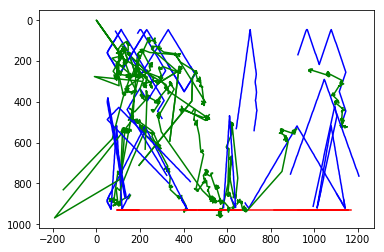

In [22]:
for v in grad:
    plt.plot(x['gaze'][v-50:v+50], y['gaze'][v-50:v+50], 'g')
    plt.plot(x['ball'][v-50:v+50], y['ball'][v-50:v+50], 'b')
    plt.plot(x['paddle'][v-50:v+50], y['paddle'][v-50:v+50], 'r')
    plt.gca().invert_yaxis() # invert the y-axis

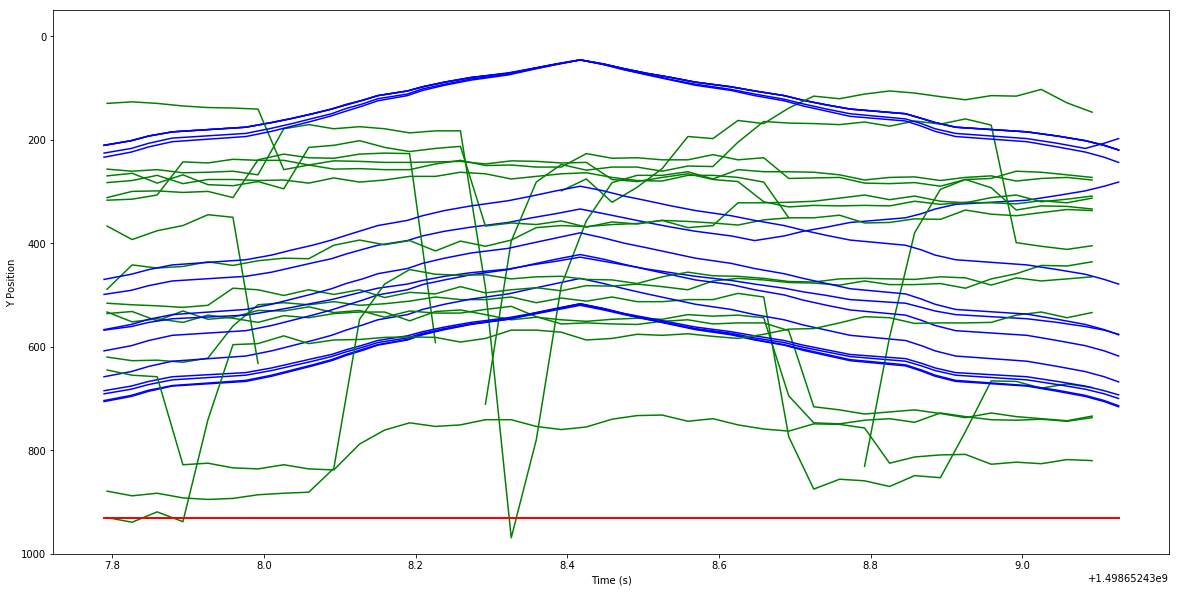

In [23]:
plt.figure(figsize=(20,10))
deltav = 20
for v in grad:
    plt.plot(t['gaze'][0:2*deltav], y['gaze'][v-deltav:v+deltav], 'g')
    plt.plot(t['paddle'][0:2*deltav], y['ball'][v-deltav:v+deltav], 'b')
    plt.plot(t['paddle'][0:2*deltav], y['paddle'][v-deltav:v+deltav], 'r')
    plt.ylabel('Y Position')
    plt.xlabel('Time (s)')
    plt.ylim((-50,1000))
    plt.gca().invert_yaxis()

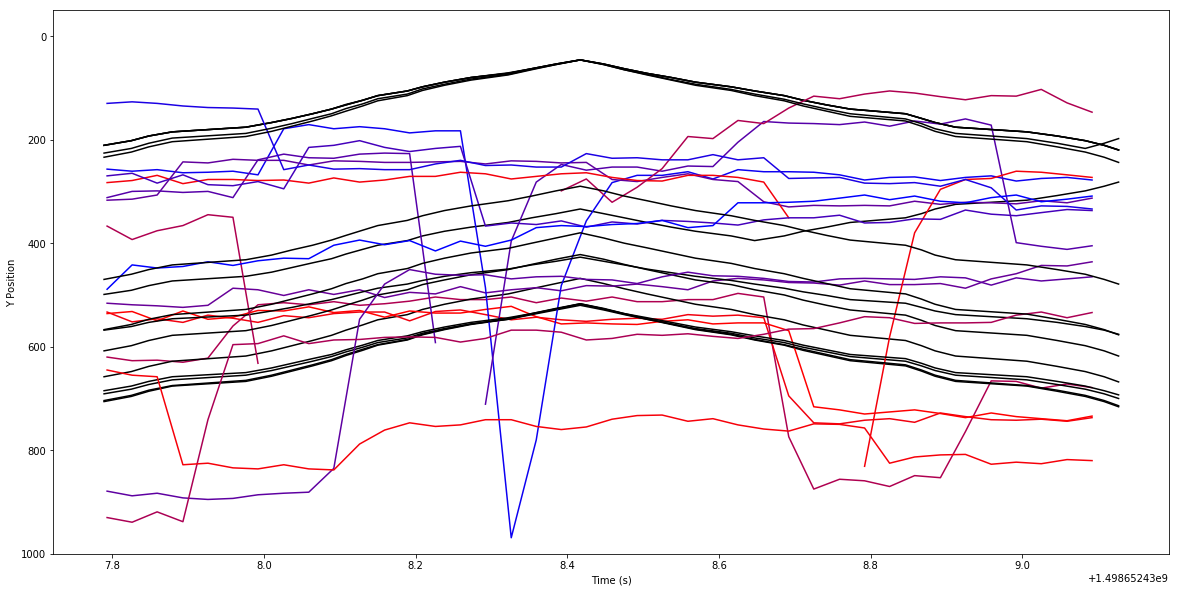

In [24]:
plt.figure(figsize=(20,10))
deltav = 20
grad_h = np.random.rand(len(grad))
grad_h = np.array(grad_h)
grad_h -= grad_h.min()
grad_h /= grad_h.max() # normalisation entre 0 et 1

for v, g_h in zip(grad, grad_h):
    c = [1-g_h, 0, g_h]
    plt.plot(t['gaze'][0:2*deltav], y['gaze'][v-deltav:v+deltav], c=c)
    plt.plot(t['paddle'][0:2*deltav], y['ball'][v-deltav:v+deltav], 'k')
    #plt.plot(t['paddle'][0:2*deltav], y['paddle'][v-deltav:v+deltav], 'r')
    plt.ylabel('Y Position')
    plt.xlabel('Time (s)')
    plt.ylim((-50,1000))
    plt.gca().invert_yaxis()

In [25]:
grad

[65,
 345,
 431,
 544,
 680,
 750,
 800,
 968,
 1536,
 1623,
 1715,
 1858,
 2226,
 2825,
 4405]

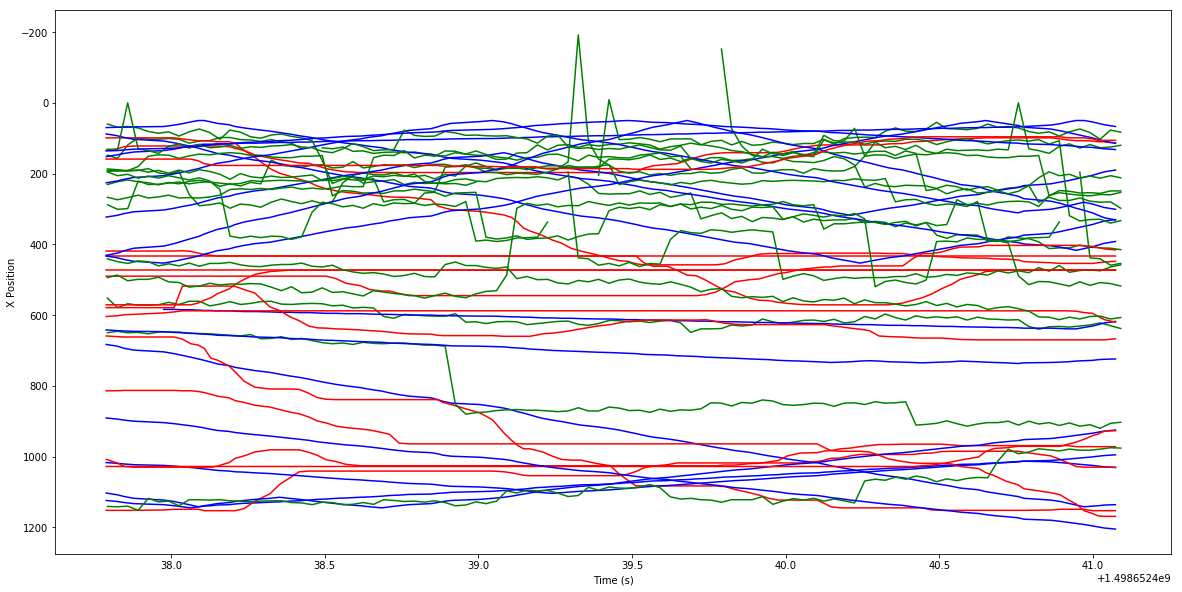

In [26]:
plt.figure(figsize=(20,10))
deltav = 50
for v in grad:
    plt.plot(t['gaze'][0:2*deltav], x['gaze'][v-deltav:v+deltav], 'g')
    plt.plot(t['paddle'][0:2*deltav], x['ball'][v-deltav:v+deltav], 'b')
    plt.plot(t['paddle'][0:2*deltav], x['paddle'][v-deltav:v+deltav], 'r')
    plt.ylabel('X Position')
    plt.xlabel('Time (s)')
    plt.gca().invert_yaxis()

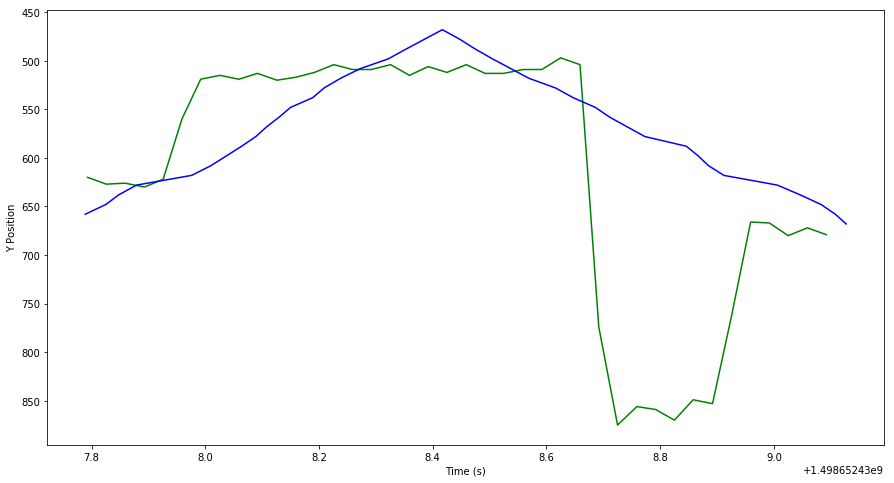

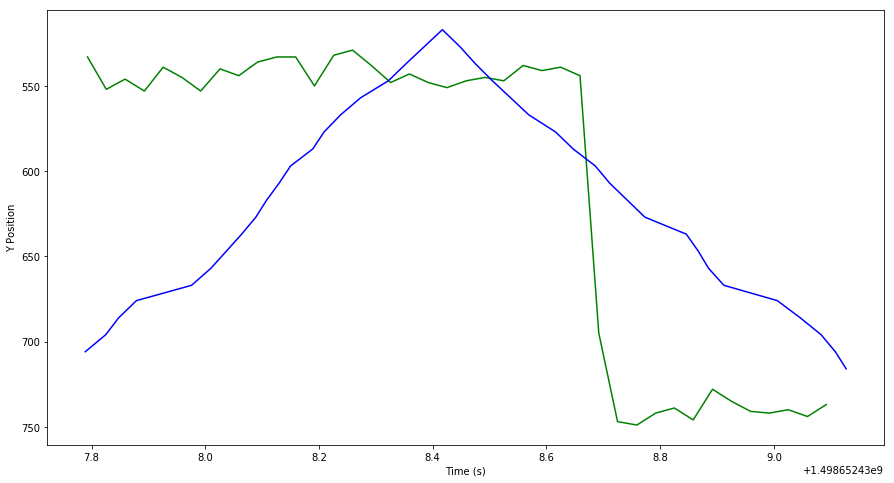

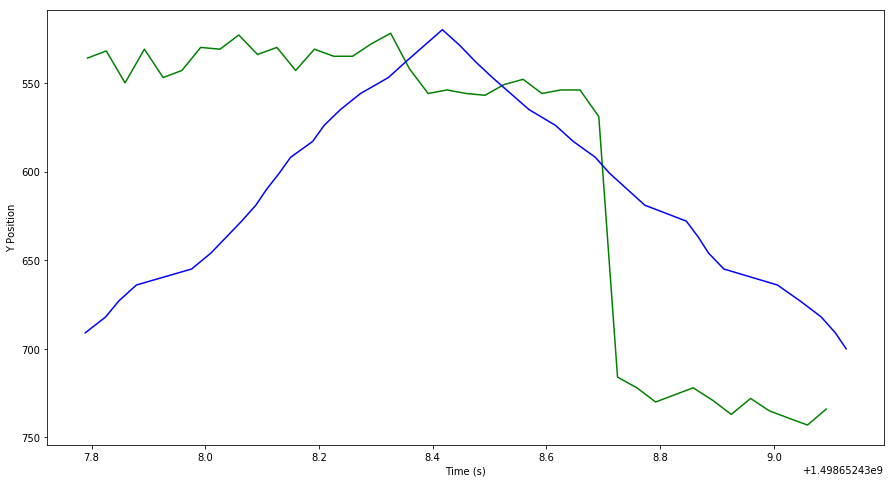

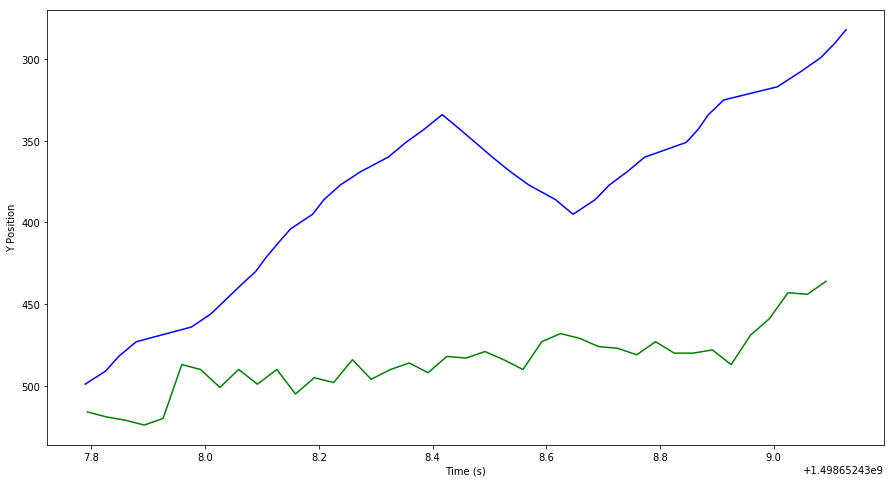

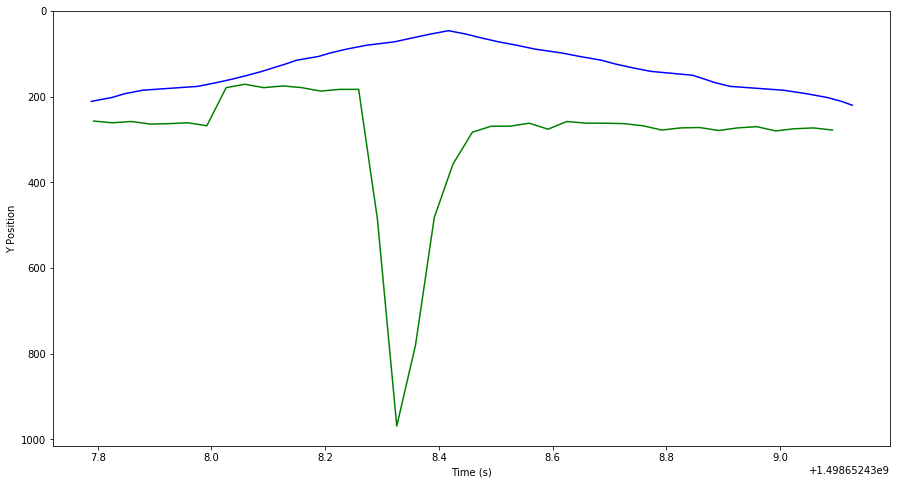

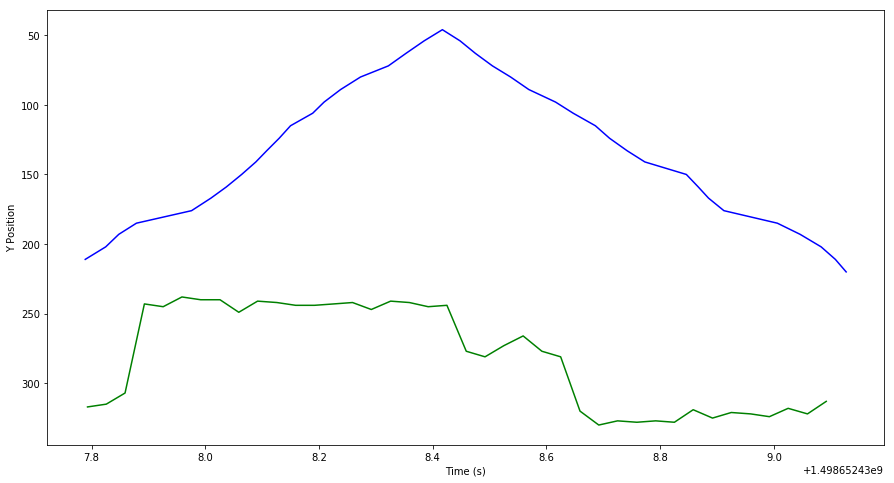

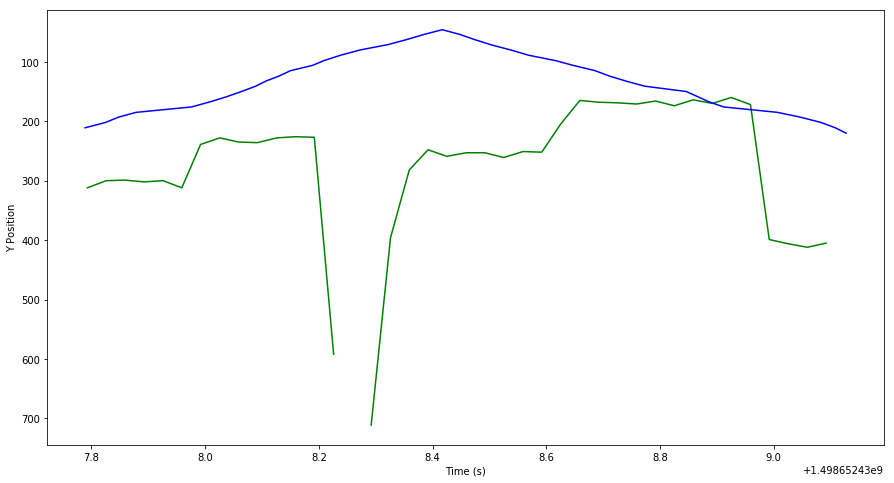

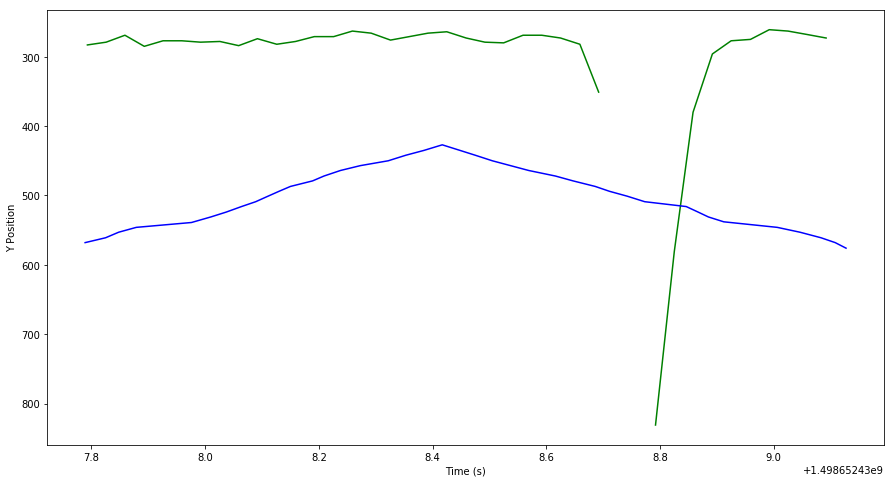

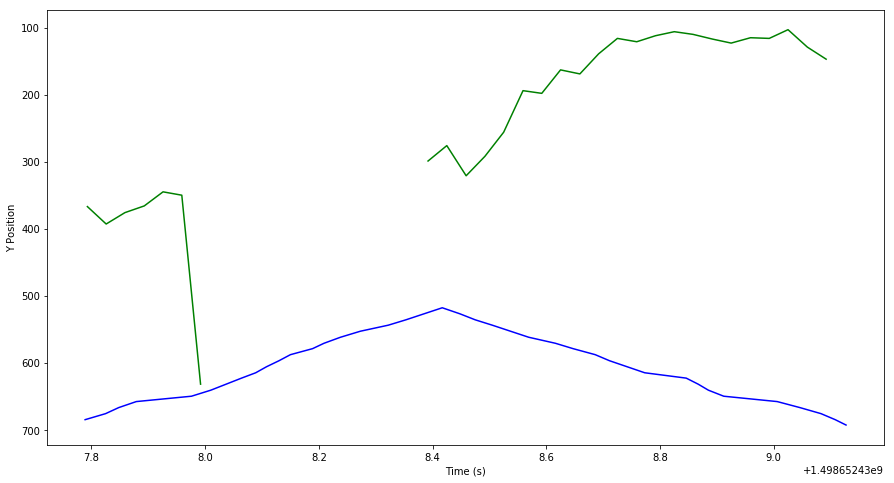

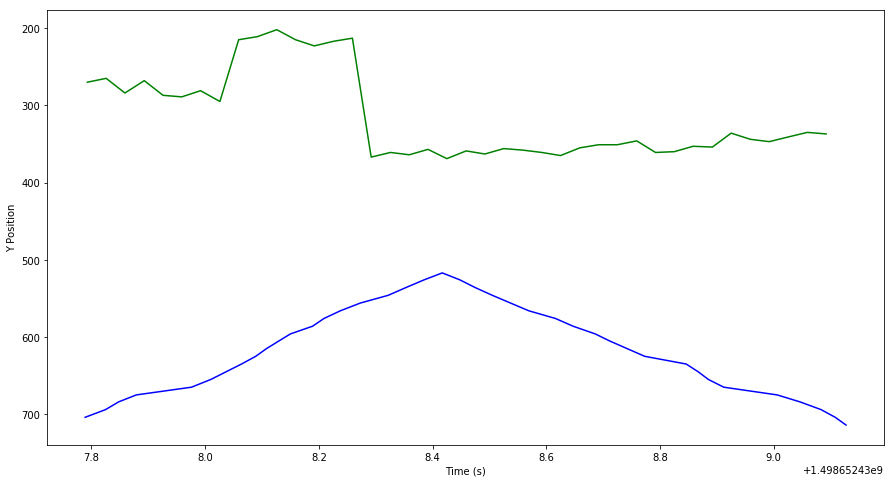

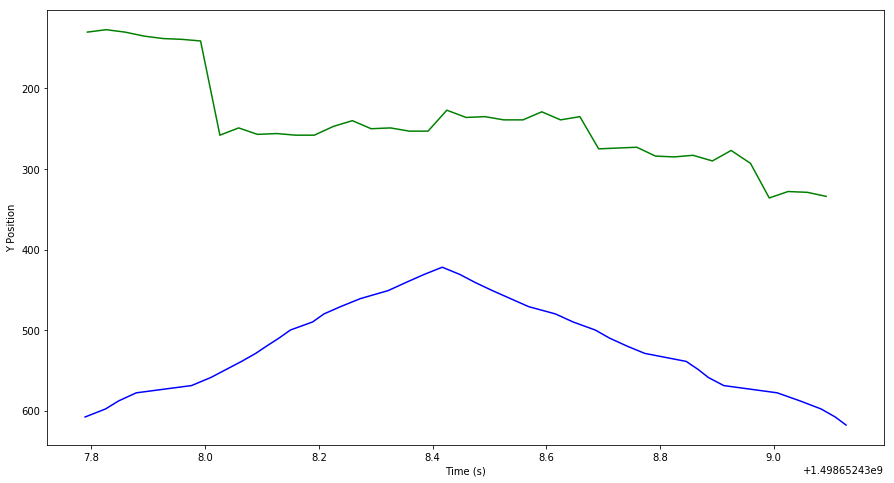

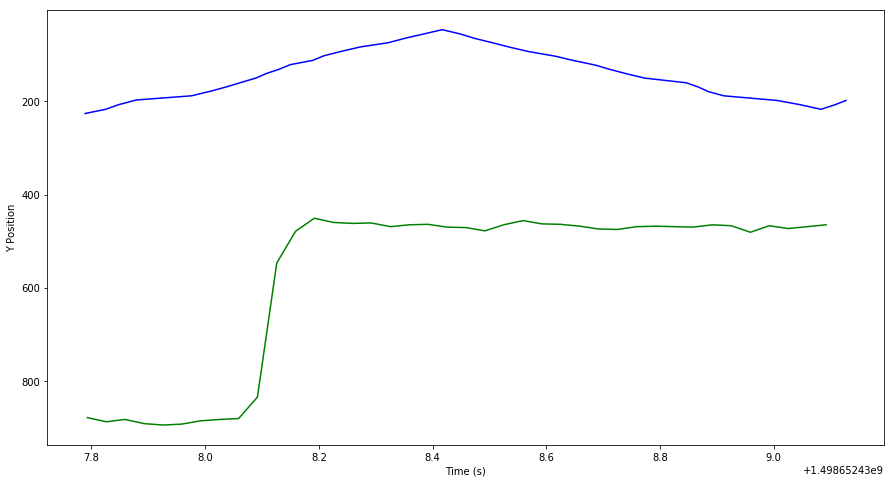

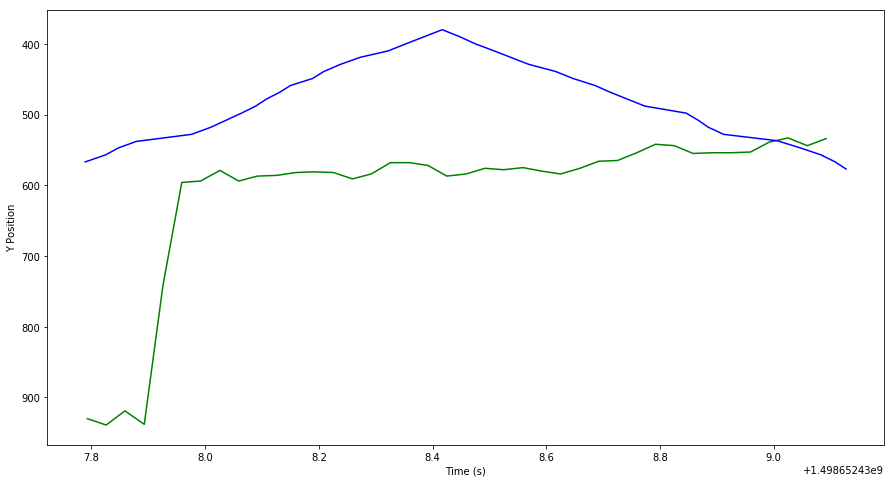

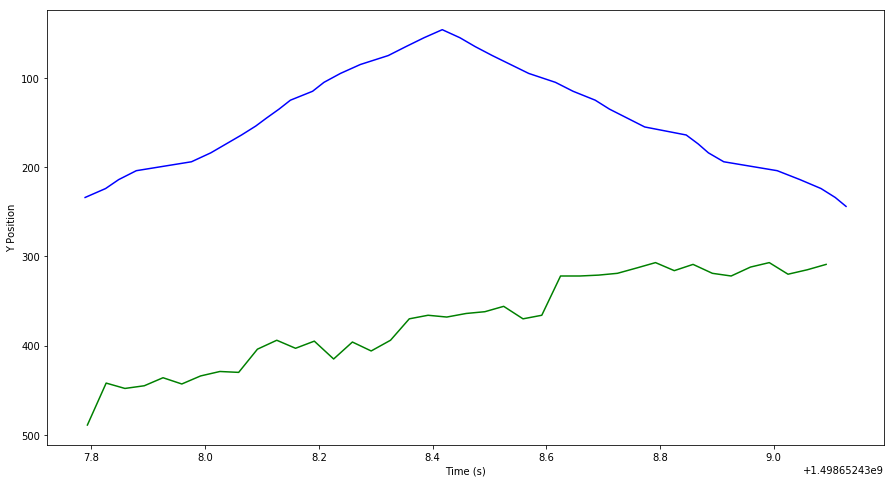

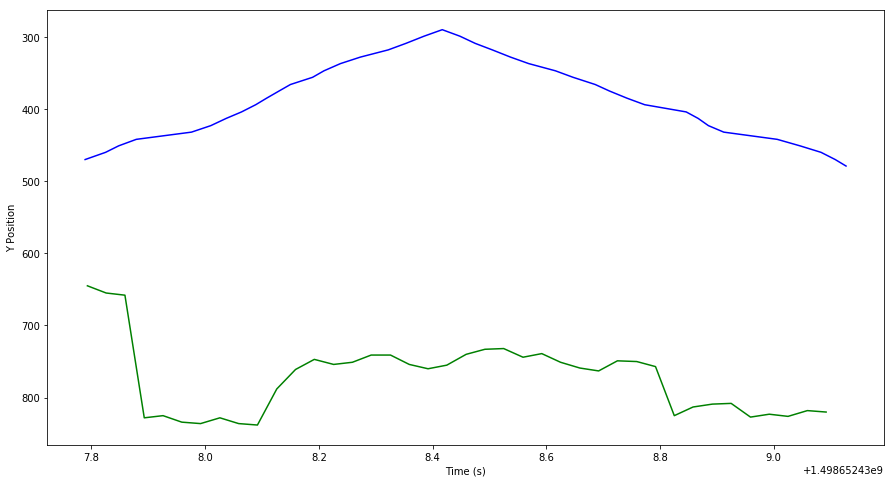

In [27]:
deltav = 20
fig = []
j = 0
for v in grad:
    fig.append(fig)
    fig[j], ax = plt.subplots(figsize=(15,8))
    ax.plot(t['gaze'][0:2*deltav], y['gaze'][v-deltav:v+deltav], 'g')
    ax.plot(t['paddle'][0:2*deltav], y['ball'][v-deltav:v+deltav], 'b')
    #ax.plot(t['paddle'][0:2*deltav], y['paddle'][v-deltav:v+deltav], 'r')
    plt.ylabel('Y Position')
    plt.xlabel('Time (s)')
    plt.gca().invert_yaxis()
    j += 1